In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
titanik = pd.read_csv("../input/titanik-csv/titanic.csv")

In [3]:
titanik.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


Features
survival - Survival (0 = No; 1 = Yes)
class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
name - Name
sex - Sex
age - Age
sibsp - Number of Siblings/Spouses Aboard
parch - Number of Parents/Children Aboard
ticket - Ticket Number
fare - Passenger Fare
cabin - Cabin
embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
boat - Lifeboat (if survived)
body - Body number (if did not survive and body was recovered)

In [4]:
titanik.shape

(1310, 14)

In [5]:
titanik.dtypes

pclass       float64
survived     float64
name          object
sex           object
age          float64
sibsp        float64
parch        float64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

<AxesSubplot:xlabel='survived', ylabel='count'>

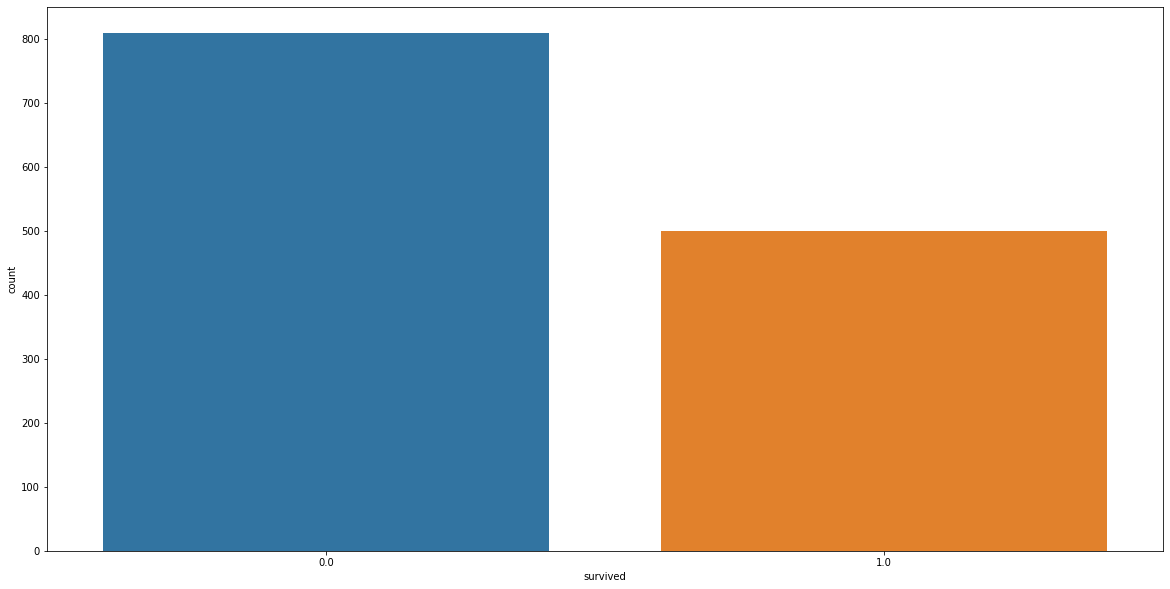

In [6]:
plt.figure(figsize=(20,10))
sns.countplot(x = "survived", data = titanik)  

veri setindeki hayatta kalanların ve ölenlerin sayısını gösteren çubuk grafiği (1:kurtulanlar, 0: ölenler)

<AxesSubplot:xlabel='survived', ylabel='count'>

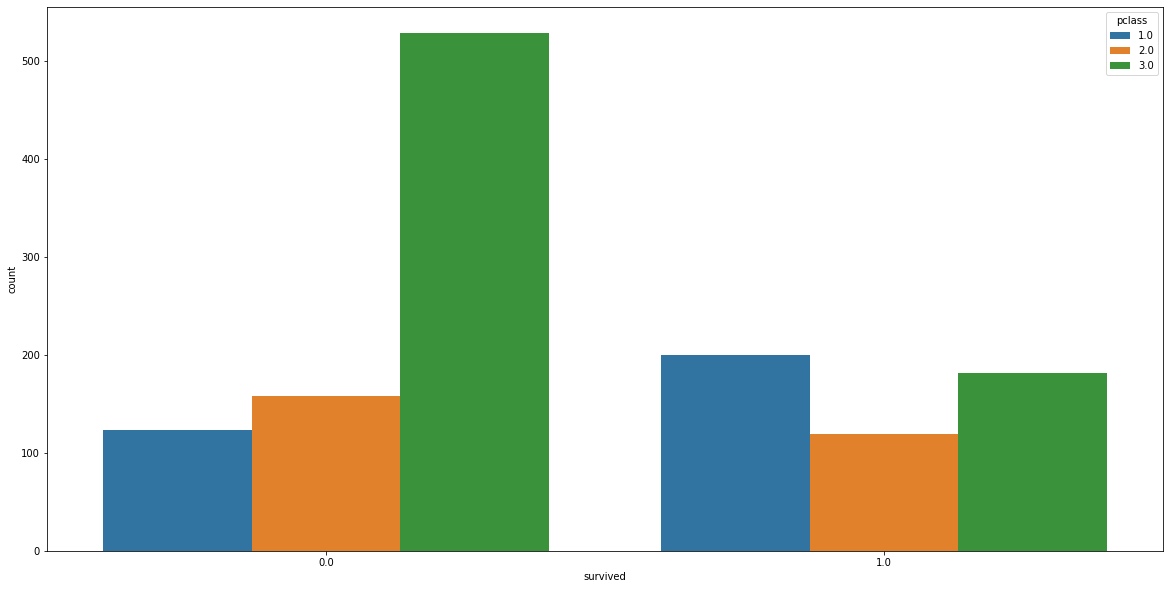

In [7]:
plt.figure(figsize=(20,10))
sns.countplot(x = "survived", hue = "pclass",  data = titanik) 

Veri setindeki hayatta kalanların ve ölenlerin sayısını, bulunduğu sınıfa göre gösteren çubuk grafiği.

<AxesSubplot:xlabel='survived', ylabel='count'>

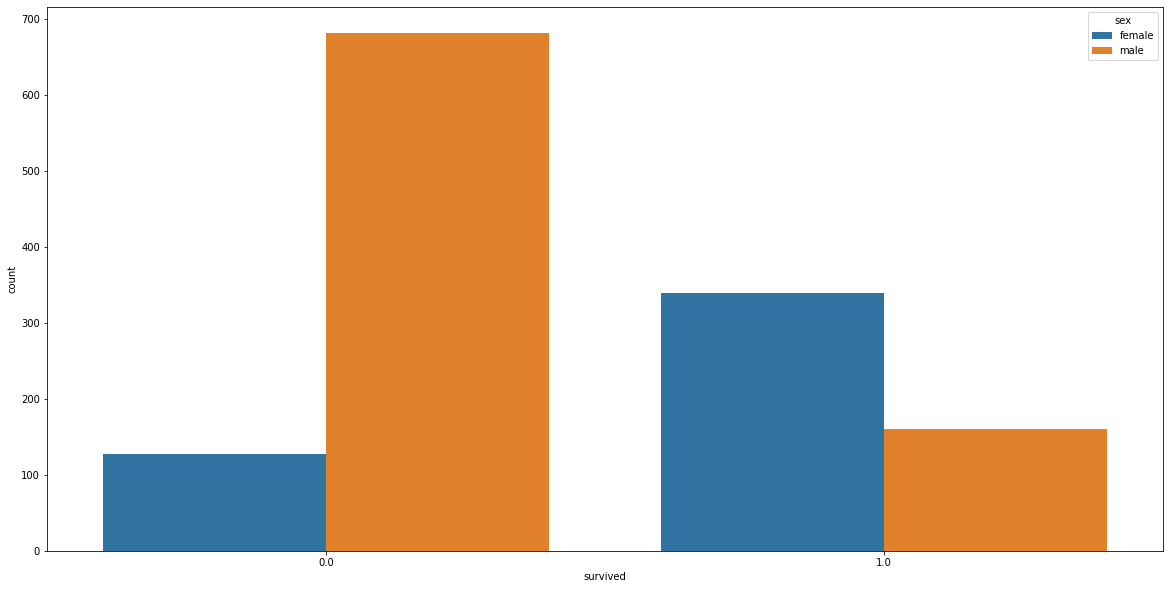

In [8]:
plt.figure(figsize=(20,10))
sns.countplot(x = "survived", hue = "sex",  data = titanik) 

Veri setindeki hayatta kalanların ve ölenlerin sayısını, cinsiyete göre gösteren çubuk grafiği

<AxesSubplot:ylabel='Frequency'>

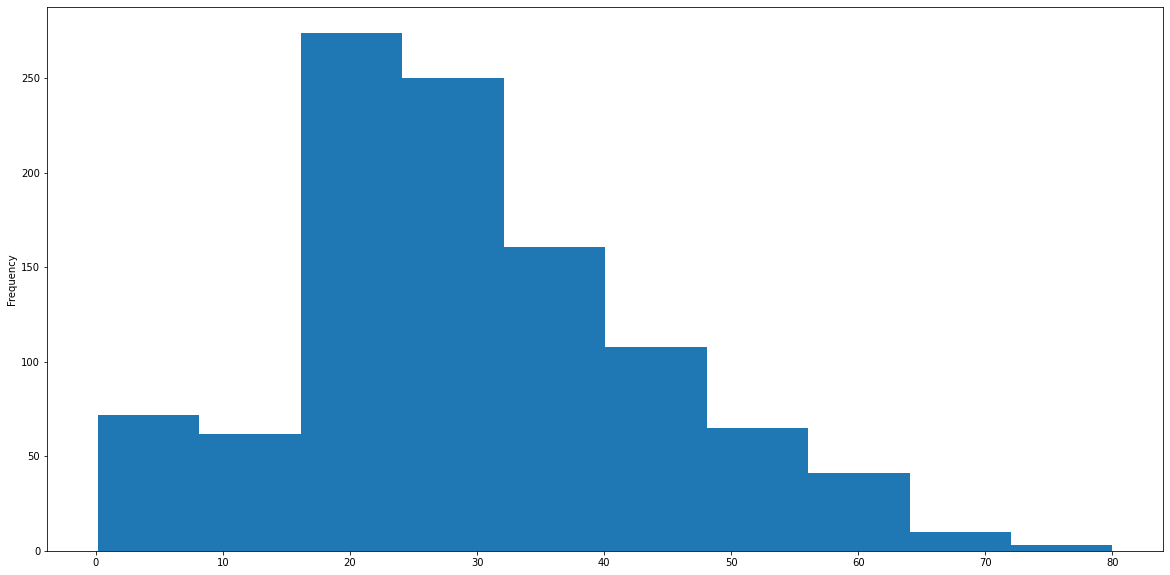

In [9]:
plt.figure(figsize=(20,10))
titanik["age"].plot.hist() 

Gemideki yolcuların, yaşlarının histogram grafiği

<AxesSubplot:ylabel='Frequency'>

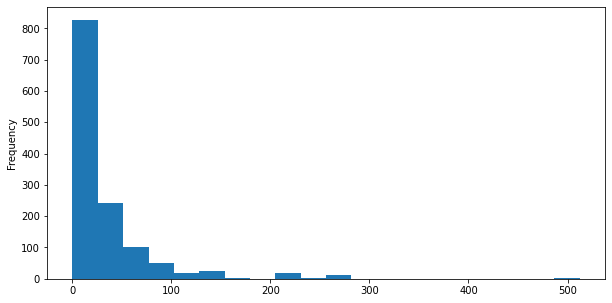

In [10]:
plt.figure(figsize=(20,10))
titanik["fare"].plot.hist(bins = 20, figsize = (10,5)) 

Bilet ücreti bilgisinin histogram grafiği

<AxesSubplot:xlabel='sibsp', ylabel='count'>

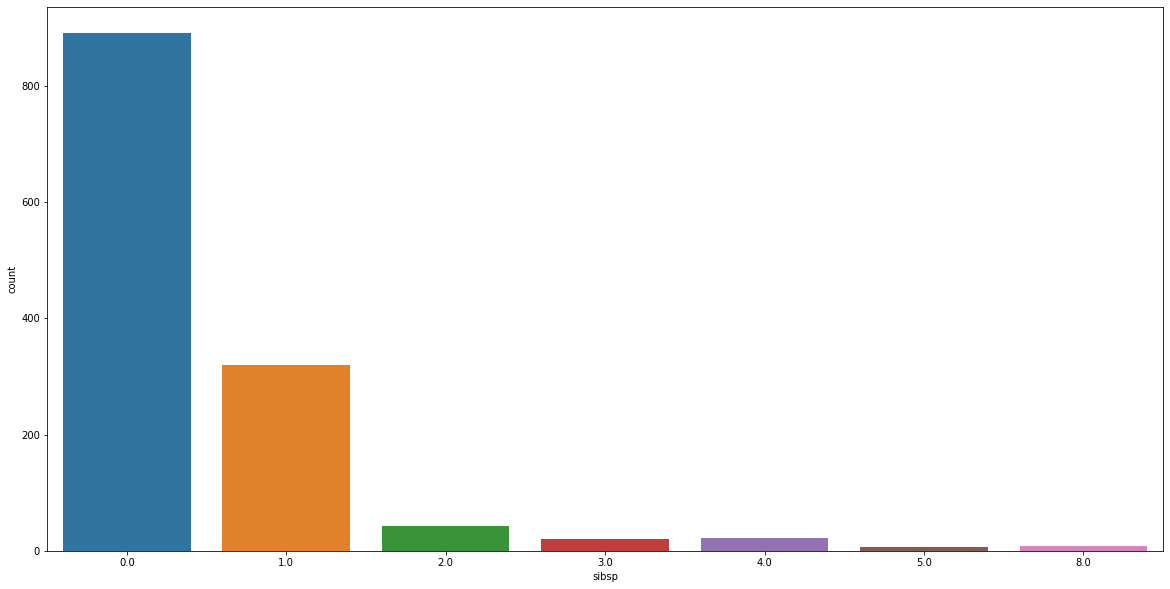

In [11]:
plt.figure(figsize=(20,10))
sns.countplot(x = "sibsp", data = titanik)

Gemideki eş/kardeş sayısını gösteren grafik.

In [12]:
titanik.isnull()

titanik.isnull().sum()  ###verideki kayıp olanların toplamına baktık böylece çok fazla eksik olan columnları görebileceğiz

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

<AxesSubplot:>

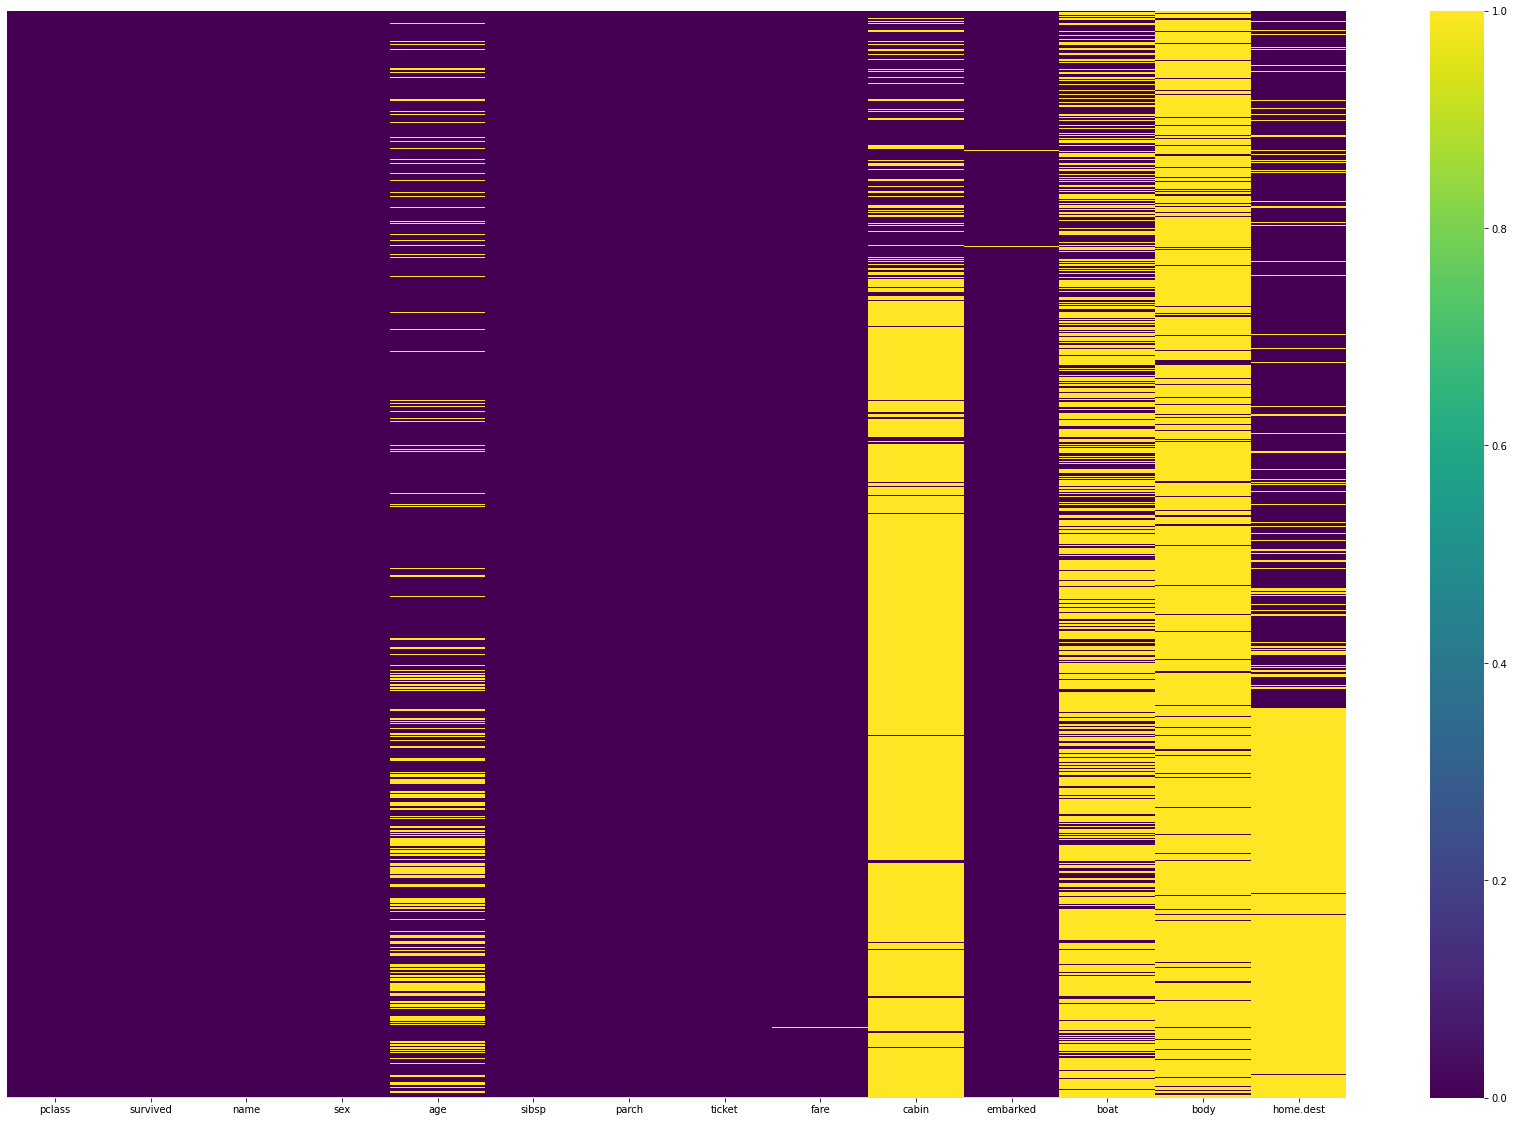

In [13]:
plt.figure(figsize=(30,20))
sns.heatmap(titanik.isnull(), yticklabels=False, cmap="viridis")

Isı haritasında eksik verilerin olduğu columsları daha net görebiliriz

In [14]:
titanik.drop(["cabin", "boat", "body", "home.dest"], axis = 1, inplace = True)
titanik.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,S
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,S


In [15]:
titanik.dropna(inplace = True)  ##Kayıp veriler silindi.

In [16]:
titanik.isnull().sum() ##eksik veri kalmadıpını görebiliyoruz.

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

In [17]:
titanik.dtypes

pclass      float64
survived    float64
name         object
sex          object
age         float64
sibsp       float64
parch       float64
ticket       object
fare        float64
embarked     object
dtype: object

In [18]:
sex = pd.get_dummies(titanik["sex"], drop_first = True) ##Cinsiyet kategorisindeki verileri 0 ve 1'lerden oluşan verilere dönüştürüyoruz

In [19]:
sex.head() ##0:kadın, 1:erkek 

,male
0,0
1,1
2,0
3,1
4,0


In [20]:
titanik.embarked.value_counts()

S    781
C    212
Q     50
Name: embarked, dtype: int64

In [21]:
titanik.pclass.value_counts()

3.0    500
1.0    282
2.0    261
Name: pclass, dtype: int64

In [22]:
embarked = pd.get_dummies(titanik["embarked"], drop_first = True)

Cinsiyet versine yapılan işlemler gemiye binme yeri ve seyehat edilen sınıf için de yapıldı.

In [23]:
pclass = pd.get_dummies(titanik["pclass"], drop_first = True)

In [24]:
titanik.drop(["sex","embarked","pclass"], axis = 1, inplace = True)

Object tipinde kalan veriler silindi.

In [25]:
titanik = pd.concat([titanik, sex, embarked, pclass], axis = 1) ##object halden dönüşmüş veriler dataya eklendi.

In [26]:
titanik.dtypes

survived    float64
name         object
age         float64
sibsp       float64
parch       float64
ticket       object
fare        float64
male          uint8
Q             uint8
S             uint8
2.0           uint8
3.0           uint8
dtype: object

In [27]:
titanik.drop(["name", "ticket"], axis = 1, inplace = True)

In [28]:
titanik.head()


,survived,age,sibsp,parch,fare,male,Q,S,2.0,3.0
0,1.0,29.0000,0.0,0.0,211.3375,0,0,1,0,0
1,1.0,0.9167,1.0,2.0,151.5500,1,0,1,0,0
2,0.0,2.0000,1.0,2.0,151.5500,0,0,1,0,0
3,0.0,30.0000,1.0,2.0,151.5500,1,0,1,0,0
4,0.0,25.0000,1.0,2.0,151.5500,0,0,1,0,0


**Logistic Regression**

In [29]:
X = titanik.drop("survived", axis = 1)

y = titanik["survived"]

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=100)
from sklearn.linear_model import LogisticRegression

In [32]:
lg_model = LogisticRegression(C=0.1 ,max_iter=1000)
lg_model.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=1000)

In [33]:
lg_model.score(X_test,y_test)


0.7816091954022989

In [34]:
lg_model.score(X_train,y_train)

0.7953964194373402

In [35]:
from sklearn.metrics import confusion_matrix
tahmin = lg_model.predict(X_test)

confusion_matrix(y_test,tahmin)

array([[124,  21],
       [ 36,  80]])

In [36]:
yeni_veri = np.array([[23,0,0,211.3375,0,0,1,0,0]])
lg_model.predict(yeni_veri)

array([1.])

Eğitimin ardından rastgele yeni değerler girildi ve sonuç hayatta kalır olarak verildi.